## Logistic Regression


Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

More details for Logistic Regression at wikipedia page;
https://en.wikipedia.org/wiki/Logistic_regression


### In this Exercise:
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

In [252]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [253]:
#importing the datasets

churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [254]:
#now we will combine the data sets to get one dataframe. 

df = pd.merge(churn_data,customer_data, how = 'inner', on = 'customerID')
telecom = pd.merge(df, internet_data, how = 'inner', on = 'customerID')

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [255]:
#Now lets describe and get some info

telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [256]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [257]:
#function to convert to binary

def convert_bin(x):
    
    x = x.lower()
    
    if x == 'yes':
        return 1
    else:
        return 0

In [258]:
#now apply the convert function to get 1s and 0s.
telecom['PhoneService'] = telecom['PhoneService'].apply(convert_bin)
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].apply(convert_bin)
telecom['Churn'] = telecom['Churn'].apply(convert_bin)
telecom['Partner'] = telecom['Partner'].apply(convert_bin)
telecom['Dependents'] = telecom['Dependents'].apply(convert_bin)

In [259]:
#let's have a look at our data frame;

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [260]:
#now we will make the dummy variables and then concatenate the data frames as we go...

# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [261]:
#lets have a look at our data frame

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [262]:
#now we can drop the columns from which we have created the dummies.

telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis =1)

In [263]:
#converting the total charges column to float
telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [264]:
#checking the data type of each columns
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

## Checking for any outlier by doing some EDA

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

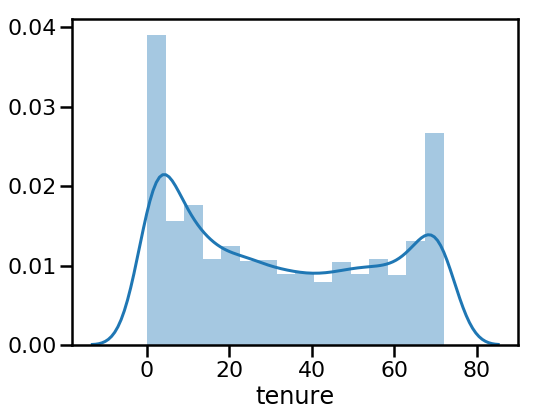

In [266]:
plt.figure(figsize = (8,6))
sns.distplot(telecom['tenure'])

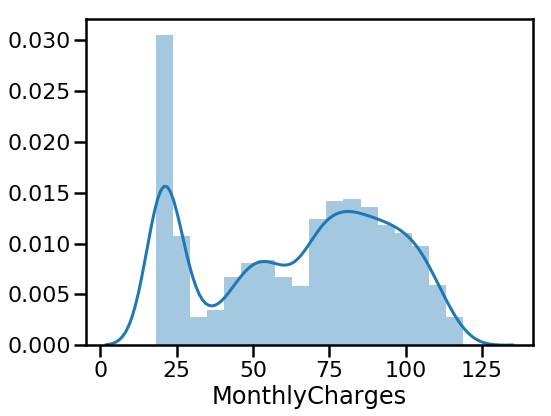

In [267]:
plt.figure(figsize = (8,6))
sns.distplot(telecom['MonthlyCharges'])

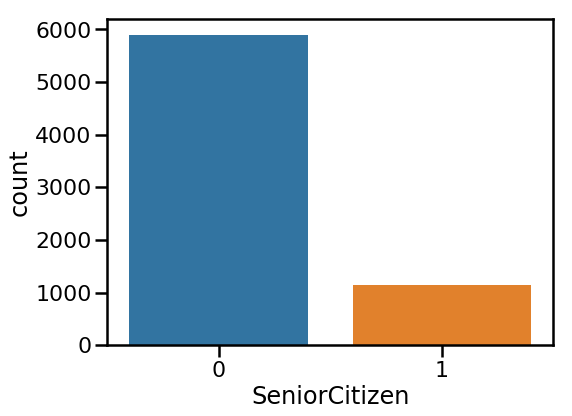

In [268]:
plt.figure(figsize = (8,6))
sns.countplot(telecom['SeniorCitizen'])

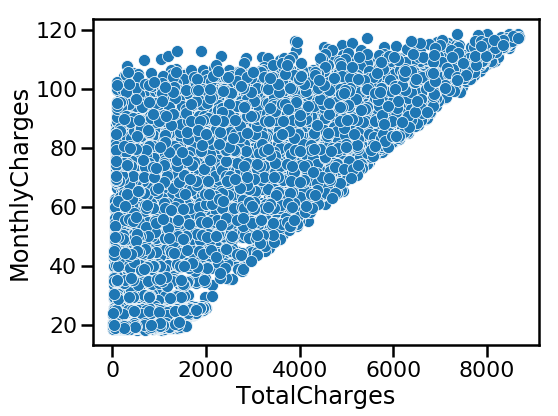

In [269]:
plt.figure(figsize = (8,6))
sns.scatterplot(telecom['TotalCharges'], telecom['MonthlyCharges'])

In [270]:
#checking for missing values
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

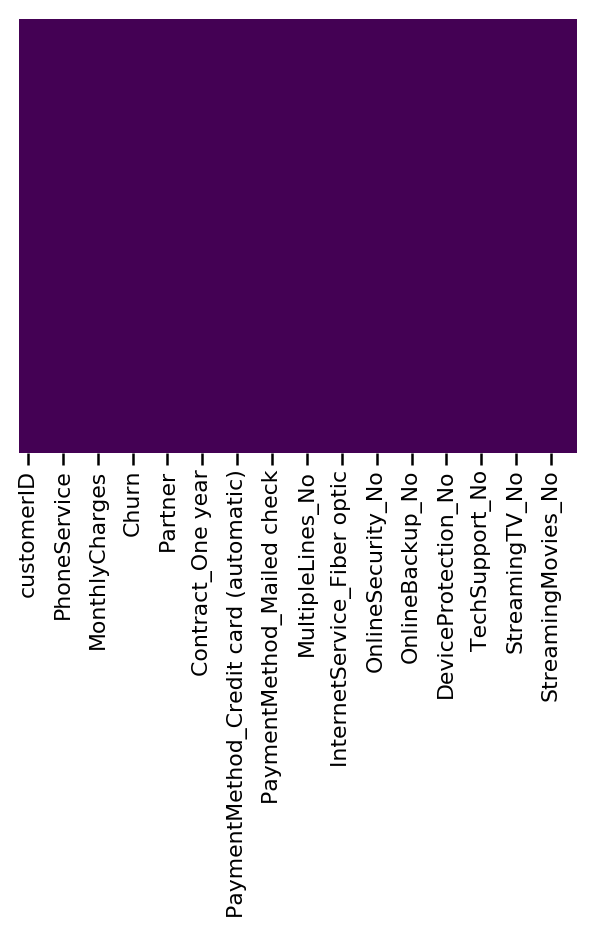

In [271]:
#we can see that total charges column has some missing values
plt.figure(figsize = (10,8))
sns.heatmap(telecom.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [272]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

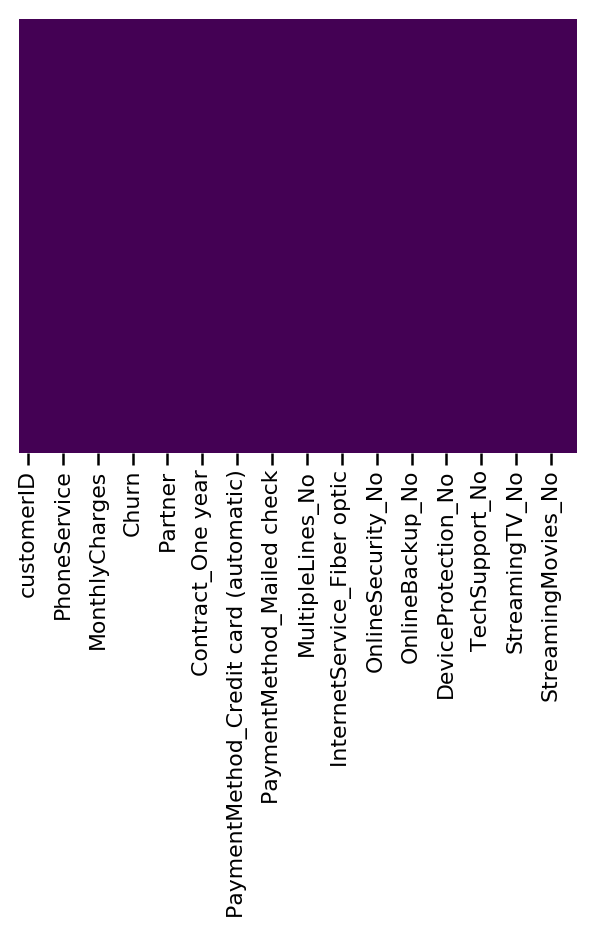

In [273]:
plt.figure(figsize = (10,8))
sns.heatmap(telecom.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

### As we can see that the missing values have been removed. Some times we can replace the missing values by the mean values of the same column.

In [274]:
#getting the numeric data
df_1 = telecom._get_numeric_data()
df_1.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [275]:
# Normalising continuous features
df_2 = telecom[['tenure','MonthlyCharges','TotalCharges']]
df_2.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [276]:
#normalise function
def normalised_df(x):
    
    return((x - x.mean())/x.std())



In [277]:
#apply the function
normalized_df = df_2.apply(normalised_df)

In [278]:
normalized_df.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391


In [279]:
#dropping the old columns
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis =1)

In [280]:
#concatenate with the normalised columns
telecom = pd.concat([telecom, normalized_df], axis =1)

In [281]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [282]:
#checking the churn %

churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

## Model building

### Spliting the data into train and test set

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
#defining X and y

X = telecom.drop(['Churn', 'customerID'], axis =1)

y= telecom['Churn']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [286]:
#importing and training the model

import statsmodels.api as sm

X_train = sm.add_constant(X_train)

lm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())

lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 03 Apr 2019   Deviance:                       4009.4
Time:                        16:38:28   Pearson chi2:                 6.07e+03
No. Iterations:                    93   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
StreamingMovies_No                       -0.3459      0.133     -2.609      0.009      -

In [287]:
#lets check the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



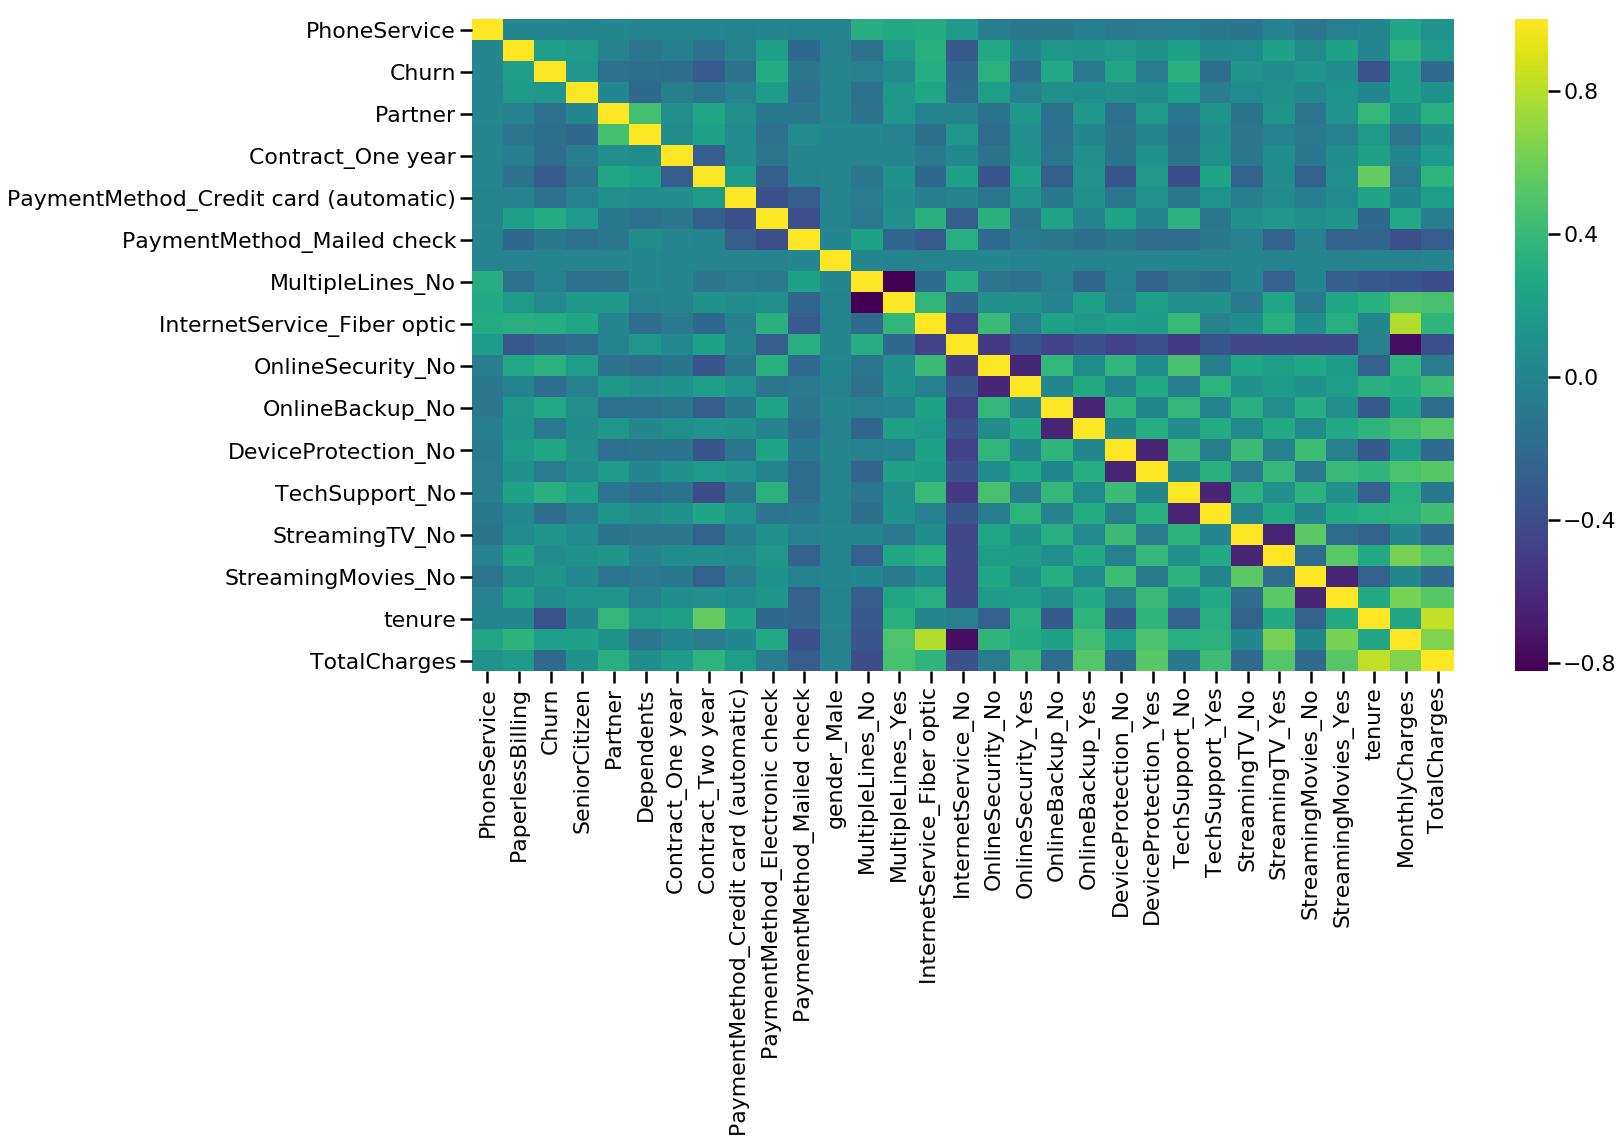

In [288]:
plt.figure(figsize = (22,12))
#sns.set_context('poster')

sns.heatmap(telecom.corr(), annot= False, cmap= 'viridis')

In [289]:
#dropping the highly correlated vars;

X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)



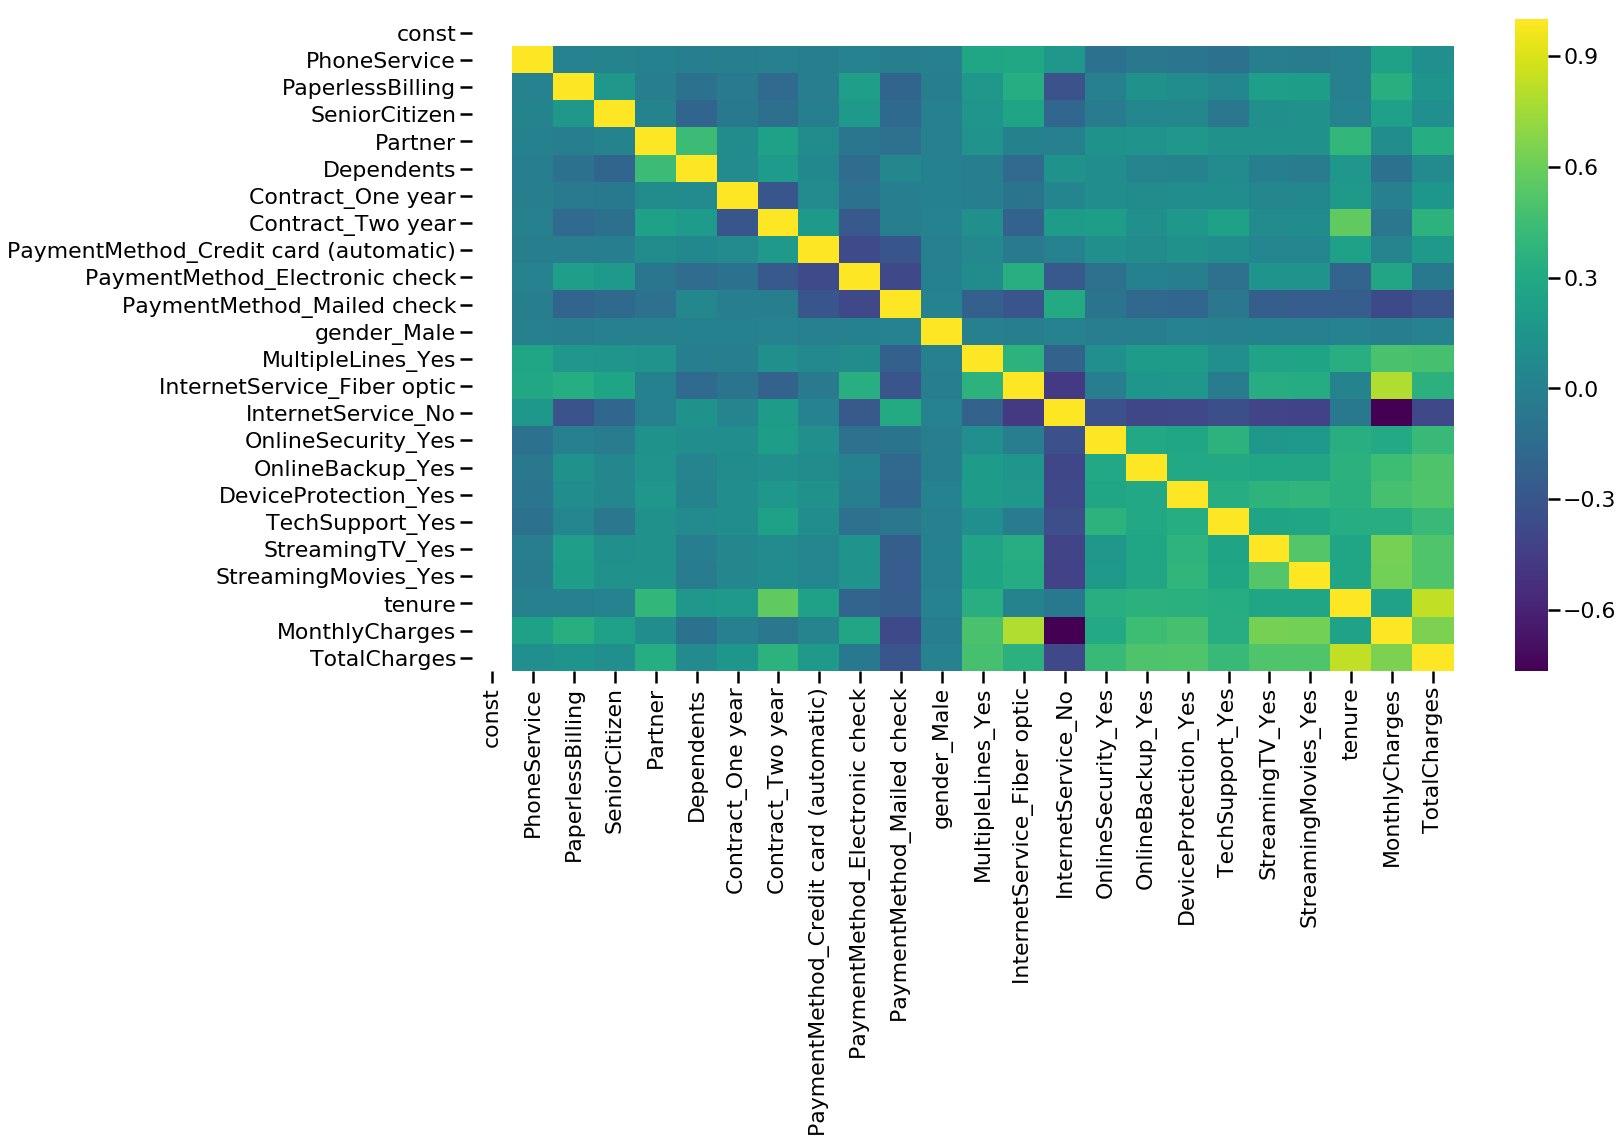

In [290]:
plt.figure(figsize = (22,12))
#sns.set_context('poster')

sns.heatmap(X_train2.corr(), annot= False, cmap= 'viridis')

In [291]:
#now we will re-run the model

X_train2 = sm.add_constant(X_train2)

lm2 = sm.GLM(y_train,X_train2, family= sm.families.Binomial())

lm2.fit().summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 03 Apr 2019   Deviance:                       4009.4
Time:                        16:38:32   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

## Recursive Feature Elimination

In [292]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)
rfe = rfe.fit(X,y)
features_df = pd.DataFrame()

features_df['rfe_support'] = rfe.support_
features_df['rfe_rank'] = rfe.ranking_
features_df['features'] = X.columns

features_df

,rfe_support,rfe_rank,features
0,True,1,PhoneService
1,True,1,PaperlessBilling
2,False,2,SeniorCitizen
3,False,18,Partner
4,False,6,Dependents
5,True,1,Contract_One year
6,True,1,Contract_Two year
7,False,11,PaymentMethod_Credit card (automatic)
8,True,1,PaymentMethod_Electronic check
9,False,12,PaymentMethod_Mailed check


In [293]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [294]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [295]:
#comparing the model with stats model

X_train = sm.add_constant(X_train[col])
lm4 = sm.GLM(y_train,X_train, family= sm.families.Binomial())
lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Wed, 03 Apr 2019   Deviance:                       4048.4
Time:                        16:38:33   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

In [296]:
#importing the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
X.columns

Index(['PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [298]:
col2 = ['PhoneService', 'TotalCharges', 'tenure', 'PaperlessBilling', 'InternetService_No', 'Contract_Two year', 'Contract_One year',
       'TechSupport_Yes', 'OnlineSecurity_Yes', 'StreamingMovies_No', 'PaymentMethod_Electronic check',
       'MultipleLines_No', 'InternetService_Fiber optic'
       ]

In [299]:
vif = pd.DataFrame()

my_df = X[col2]

vif['VIF value'] = [variance_inflation_factor(my_df.values, i) for i in range(my_df.shape[1])]

vif['Feature'] = my_df.columns

vif

,VIF value,Feature
0,10.869873,PhoneService
1,8.579388,TotalCharges
2,6.799827,tenure
3,2.613290,PaperlessBilling
4,4.109959,InternetService_No
5,3.144824,Contract_Two year
6,1.866896,Contract_One year
7,2.013831,TechSupport_Yes
8,1.928436,OnlineSecurity_Yes
9,2.450455,StreamingMovies_No


# Dropping the feature with high VIF value

In [300]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [301]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Wed, 03 Apr 2019   Deviance:                       4051.5
Time:                        16:38:34   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [302]:
col3 = ['TotalCharges', 'tenure', 'PaperlessBilling', 'InternetService_No', 'Contract_Two year', 
        'Contract_One year',
       'TechSupport_Yes', 'OnlineSecurity_Yes', 'StreamingMovies_No', 'PaymentMethod_Electronic check',
       'MultipleLines_No', 'InternetService_Fiber optic'
       ]



In [303]:
vif = pd.DataFrame()

my_df2 = X[col3]

vif['VIF value'] = [variance_inflation_factor(my_df2.values, i) for i in range(my_df2.shape[1])]

vif['Feature'] = my_df2.columns

vif

,VIF value,Feature
0,8.242073,TotalCharges
1,6.559415,tenure
2,2.436299,PaperlessBilling
3,2.871214,InternetService_No
4,2.994942,Contract_Two year
5,1.799867,Contract_One year
6,1.970380,TechSupport_Yes
7,1.880016,OnlineSecurity_Yes
8,2.155580,StreamingMovies_No
9,1.783273,PaymentMethod_Electronic check


In [304]:
logm6 = sm.GLM(y_train,(sm.add_constant(X_train[col3])), family = sm.families.Binomial())
logm6.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Wed, 03 Apr 2019   Deviance:                       4051.5
Time:                        16:38:35   Pearson chi2:                 6.00e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
==================================================================================================
"""

## As we can see that P values are very low now so we can use these final featues in our model.

In [305]:
X_train_final = X_train[col3]
X_test_final = X_test[col3]

In [306]:
#running the model with selected featues.

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_final, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [307]:
#making the predictions with final model
y_pred = log_reg.predict_proba(X_test_final)

In [308]:
y_pred

array([[0.50091675, 0.49908325],
       [0.62730407, 0.37269593],
       [0.99326151, 0.00673849],
       ...,
       [0.99619427, 0.00380573],
       [0.54140273, 0.45859727],
       [0.99756576, 0.00243424]])

In [309]:
#convert to a data frame
y_pred = pd.DataFrame(y_pred, columns= ['Churn 0', 'Churn 1'])

y_pred.head()

,Churn 0,Churn 1
0,0.500917,0.499083
1,0.627304,0.372696
2,0.993262,0.006738
3,0.364547,0.635453
4,0.992467,0.007533


In [310]:
y_test = pd.DataFrame(y_test)

In [311]:
y_test.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [312]:
#probability conv function
def probability_conv(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [313]:
y_pred['Churn 1'] = y_pred['Churn 1'].apply(probability_conv)

In [314]:
y_pred.head()

,Churn 0,Churn 1
0,0.500917,0
1,0.627304,0
2,0.993262,0
3,0.364547,1
4,0.992467,0


## Measuring the accuracy of Model

In [315]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [316]:
confusion_matrix(y_test,y_pred['Churn 1'])

array([[1362,  166],
       [ 249,  333]], dtype=int64)

In [317]:
accuracy_score(y_test, y_pred['Churn 1'])

0.8033175355450237

In [318]:
classification_report(y_test, y_pred['Churn 1'])

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      1528\n           1       0.67      0.57      0.62       582\n\n   micro avg       0.80      0.80      0.80      2110\n   macro avg       0.76      0.73      0.74      2110\nweighted avg       0.80      0.80      0.80      2110\n'